In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [66]:
ml = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [67]:
ml.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
ml.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### customerID - is a unique id of every individual customer
### gender - the gender of the customer
### seniorCitizen - is Whether the customer is a senior citizen or not (1, 0)
### partner - does customer have a partner
### dependents - does customer have childrens
### tenure - how long customer using company's services
### phoneservice - does customer have phone connection
### multiplelines - does customer have multiple phone connection
### internetservice - type of internet connection
### onlinesecurity - does customer have online security
### 3deviceprotection - does customer have protection of their device
### techsupport - does customer have technical support of their internet
### streamingtv - does customer have streaming tv
### streamingmovies - does customer have streaming movies
### contract - type of the contract
### paperlessbilling- does customer have paperless paying or not
### paymentmethod- type of payment
### monthlycharges - sum of monthly charges
### totalcharges - sum of total charges
### churn - target value did customer left

# Our Goal is to make clear what type of factors are connect with customer leaving
first let's check the data and make data cleaning

In [69]:
ml.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
ml.duplicated().sum()

0

In [71]:
ml.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [72]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [73]:
ml['TotalCharges'] = pd.to_numeric(ml['TotalCharges'], errors='coerce')
ml = ml.dropna()

In [74]:
ml['Churn'] = ml['Churn'].map({'Yes': 1, 'No': 0})


In [75]:
categorical_cols = ml.select_dtypes(include='object').columns.drop('customerID')
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [76]:
ml['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [77]:
ml.groupby('Churn')['gender'].value_counts()

Churn  gender
0      Male      2619
       Female    2544
1      Female     939
       Male       930
Name: count, dtype: int64

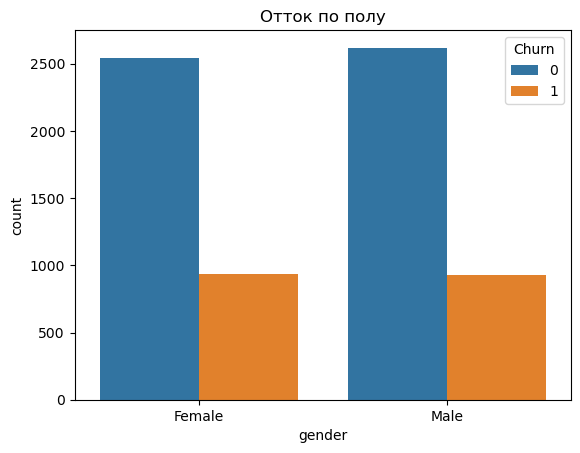

In [78]:
sns.countplot(data=ml, x='gender', hue='Churn')
plt.title('Отток по полу')
plt.show()

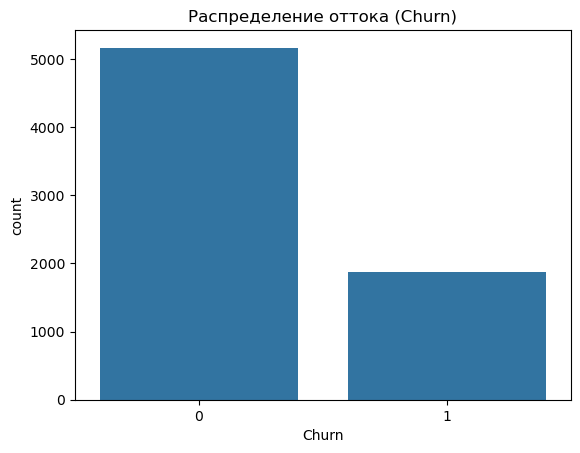

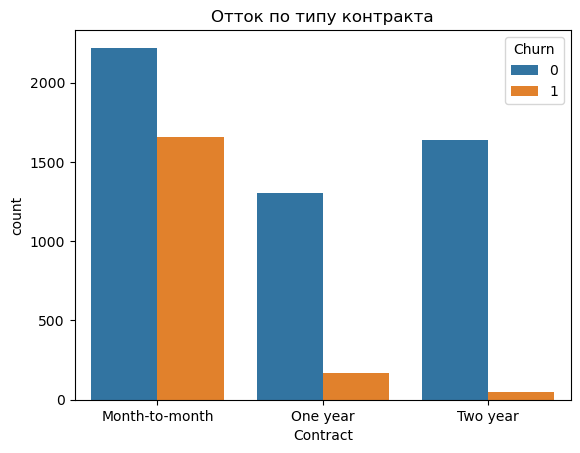

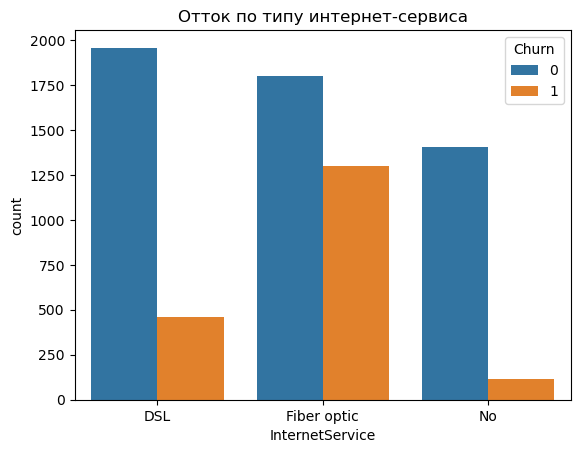

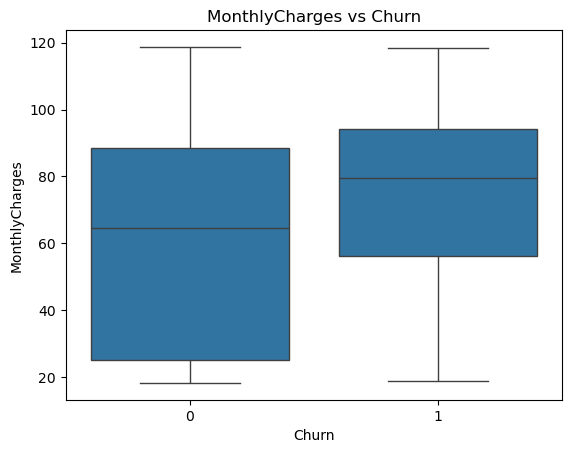

In [79]:
sns.countplot(data=ml, x='Churn')
plt.title('Распределение оттока (Churn)')
plt.show()

sns.countplot(data=ml, x='Contract', hue='Churn')
plt.title('Отток по типу контракта')
plt.show()

sns.countplot(data=ml, x='InternetService', hue='Churn')
plt.title('Отток по типу интернет-сервиса')
plt.show()

sns.boxplot(data=ml, x='Churn', y='MonthlyCharges')
plt.title('MonthlyCharges vs Churn')
plt.show()

In [80]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService']
target = 'Churn'

X = ml[features]
y = ml[target].map({'Yes': 1, 'No': 0})

In [81]:
print(X.dtypes)


gender             object
SeniorCitizen       int64
Partner            object
Dependents         object
tenure              int64
InternetService    object
dtype: object


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.45      0.53       561

    accuracy                           0.78      2110
   macro avg       0.73      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



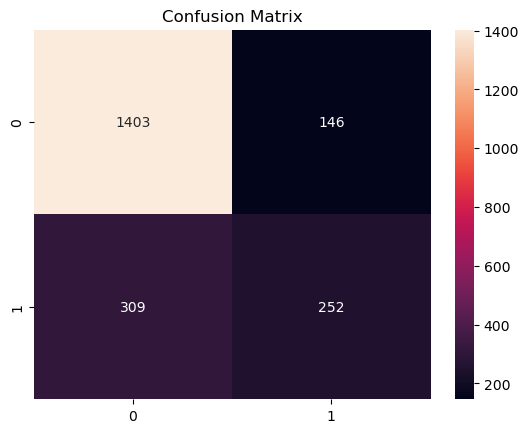

In [82]:
ml = ml[ml['Churn'].notna()]

X = ml.drop(columns='Churn')
y = ml['Churn']

categorical = X.select_dtypes(include='object').columns.tolist()
numeric = X.select_dtypes(include=['int64', 'float64']).columns.tolist()




preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough') 

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


In [83]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [84]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.45      0.53       561

    accuracy                           0.78      2110
   macro avg       0.73      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [86]:
importances = model.named_steps['classifier'].feature_importances_


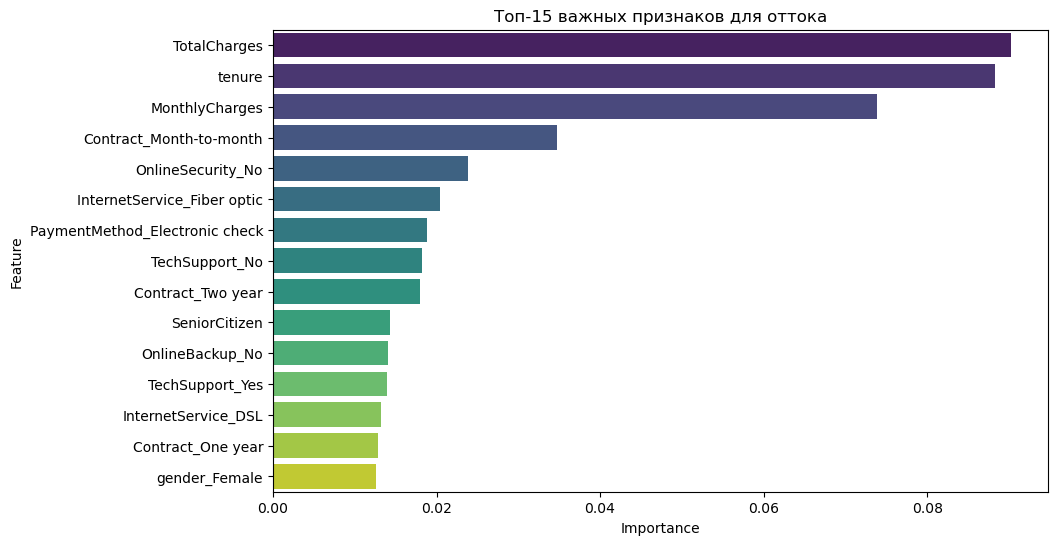

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

ohe = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_features = ohe.get_feature_names_out(ohe.feature_names_in_)

all_features = list(encoded_features) + list(X.select_dtypes(exclude='object').columns)

feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Топ-15 важных признаков для оттока')
plt.show()


In [89]:
ml['churn_proba'] = model.predict_proba(X)[:, 1]


In [92]:
discount_candidates = ml[ml['churn_proba'] > 0.75] \
    .sort_values('MonthlyCharges', ascending=False) \
    .head(10)

In [94]:
discount_candidates.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_proba
3875,2403-BCASL,Male,1,Yes,Yes,41,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,4534.90,1,0.78
818,0115-TFERT,Male,0,Yes,No,21,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.20,2317.10,1,0.78
1644,3331-HQDTW,Female,0,No,No,34,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Month-to-month,Yes,Mailed check,109.80,3587.25,1,0.78
1313,6599-RCLCJ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,109.55,5124.55,1,0.76
6952,6394-MFYNG,Female,0,No,No,48,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),107.40,5121.30,1,0.79
261,3606-TWKGI,Male,1,No,No,13,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.90,1364.30,1,0.92
2294,2027-FECZV,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.70,1253.90,1,0.90
5541,6804-GDMOI,Female,0,No,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Electronic check,106.60,6428.40,1,0.76
3061,8118-LSUEL,Male,1,No,No,23,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,2483.50,1,0.92
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,1,0.77
